In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [17]:
df = pd.read_csv('../data/cleaned.csv')
df.head()

,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Restaurant Name len,Address len
0,162,121.027535,14.565443,1100,1,0,0,3,4.8,314,16,5
1,162,121.014101,14.553708,1200,1,0,0,3,4.5,591,16,4
2,162,121.056831,14.581404,4000,1,0,0,4,4.4,270,22,4
3,162,121.056475,14.585318,1500,0,0,0,4,4.9,365,4,5
4,162,121.057508,14.584450,1500,1,0,0,4,4.8,229,11,5


In [18]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
for i in X.columns:
    corr = np.corrcoef(df[i], y)[0,1]
    print(i,': ', corr)

Country Code :  0.4017285649084314
Longitude :  -0.2845151671099206
Latitude :  -0.18222795292911353
Average Cost for two :  0.07522713542466646
Has Table booking :  0.08292908187772786
Has Online delivery :  -0.12578606854505245
Is delivering now :  -0.02593493457620779
Price range :  0.3579714045874775
Votes :  0.3866310048124126
Restaurant Name len :  0.059401870448538396
Address len :  -0.14509612530302618


In [20]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_result = lr.predict(X_test)

In [21]:
lr_score = r2_score(y_test, lr_result)
print('The r2 score of Linear Regression:',lr_score)

The r2 score of Linear Regression: 0.3678293078549555


In [22]:
lr_mae = mean_absolute_error(y_test, lr_result)
print('The Mean Absolute Error of Linear Regression:',lr_mae)

The Mean Absolute Error of Linear Regression: 0.3428344823340031


In [23]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_result = rf.predict(X_test)

In [24]:
rf_score = r2_score(y_test, rf_result)
print('The r2 score of Random Forest:',rf_score)

The r2 score of Random Forest: 0.571259616098126


In [25]:
rf_mae = mean_absolute_error(y_test, rf_result)
print('The Mean Absolute Error of Random Forest:',rf_mae)

The Mean Absolute Error of Random Forest: 0.2792358184764992


In [26]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_result = dt.predict(X_test)

In [27]:
dt_score = r2_score(y_test, dt_result)
print('The r2 score od Decision Tree:',dt_score)

The r2 score od Decision Tree: 0.05404951428646332


In [28]:
dt_mae = mean_absolute_error(y_test, dt_result)
print('The Mean Absolute Error of Decision Tree:',dt_mae)

The Mean Absolute Error of Decision Tree: 0.40632090761750406


In [29]:
final_result = [[lr_score, lr_mae], [rf_score, rf_mae], [dt_score, dt_mae]]
final_result = pd.DataFrame(final_result, columns=['R2 Score', 'Mean Absolute Error'], index=['Linear Regression', 'Random Forest', 'Decision Tree'])
final_result

,R2 Score,Mean Absolute Error
Linear Regression,0.367829,0.342834
Random Forest,0.571260,0.279236
Decision Tree,0.054050,0.406321


Random Forest
- Best R² = 0.571 → Explains ~57% of the target variability
- Lowest MAE = 0.279 → Most accurate predictions on average 
Best-performing model overall

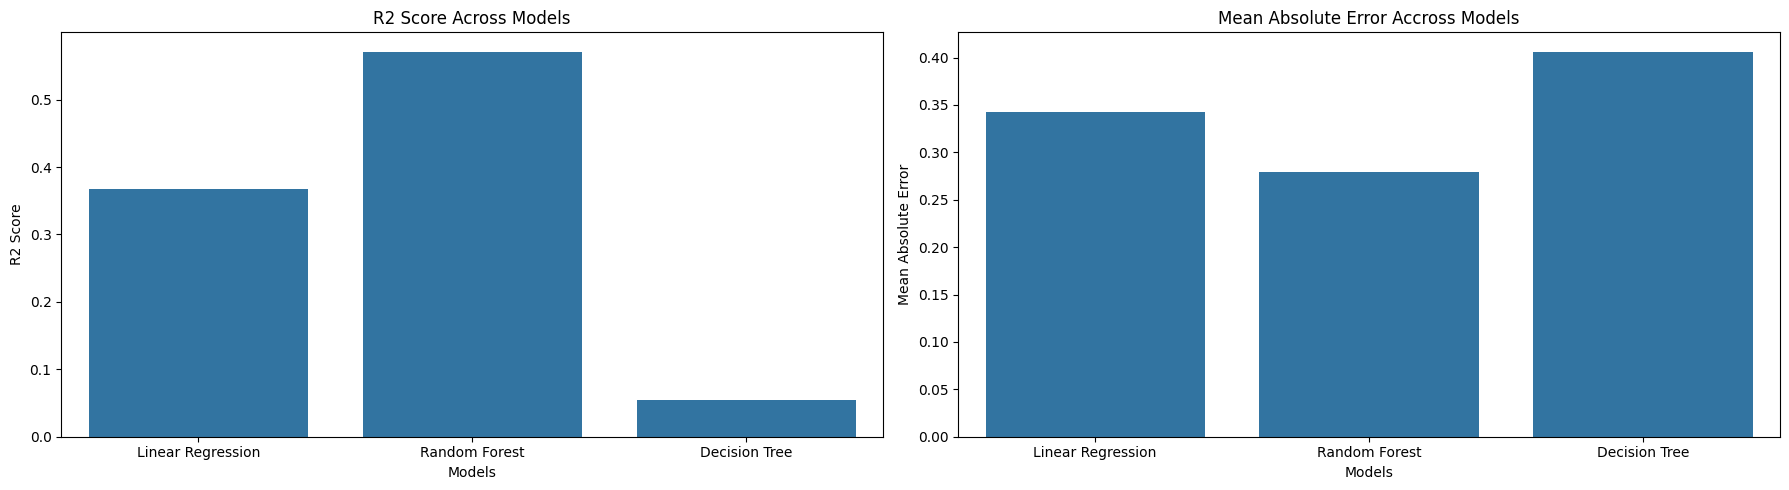

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.barplot(x=final_result.index, y=final_result['R2 Score'], ax=ax[0])
ax[0].set_xlabel('Models') 
ax[0].set_title('R2 Score Across Models')

sns.barplot(x=final_result.index, y=final_result['Mean Absolute Error'], ax=ax[1])
ax[1].set_xlabel('Models')
ax[1].set_title('Mean Absolute Error Accross Models')
plt.tight_layout()
plt.show()